In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# N_TRAIN = int(214)
# BUFFER_SIZE = int(214)
# BATCH_SIZE = 10
# STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [3]:
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
#   0.001,
#   decay_steps=STEPS_PER_EPOCH*1000,
#   decay_rate=1,
#   staircase=False)

# def get_optimizer():
#   return tf.keras.optimizers.Adam(lr_schedule)
#print(imblearn.__version__)

In [4]:
ds = pd.read_csv("glass.csv",
                 names=["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"])
print(ds)
print(type(ds['TYPE']))
print(ds['TYPE'])

      ID       RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO   BAO  FE2O3  TYPE
0      1  1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0     1
1      2  1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0     1
2      3  1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0     1
3      4  1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0     1
4      5  1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0     1
..   ...      ...    ...   ...    ...    ...   ...   ...   ...    ...   ...
209  210  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0     7
210  211  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0     7
211  212  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0     7
212  213  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0     7
213  214  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0     7

[214 rows x 11 columns]
<class 'pandas.core.series.Series'>
0      1
1      1
2      1


In [5]:
ds['TYPE'] = ds['TYPE'].replace({1:0,2:1,3:2,5:3,6:4,7:5})
print(ds)

      ID       RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO   BAO  FE2O3  TYPE
0      1  1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0     0
1      2  1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0     0
2      3  1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0     0
3      4  1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0     0
4      5  1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0     0
..   ...      ...    ...   ...    ...    ...   ...   ...   ...    ...   ...
209  210  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0     5
210  211  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0     5
211  212  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0     5
212  213  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0     5
213  214  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0     5

[214 rows x 11 columns]


In [6]:
features = preprocessing.normalize(ds)
a = ds.values
features = a[:,1:10]
label = a[:,-1]
y = preprocessing.LabelEncoder().fit_transform(label)
print(label.shape)
# type_dara = ds['TYPE']
# b = pd.get_dummies(type_dara)
# onehot = b.values

(214,)


In [7]:
#onehot

In [8]:
#features
#b
#onehot
#print(a)

Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


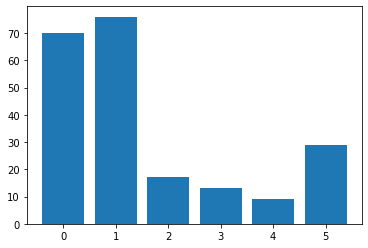

In [9]:
counter = Counter(label)
for k,v in counter.items():
	per = v / len(label) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=100 (16.667%)
Class=1, n=100 (16.667%)
Class=2, n=100 (16.667%)
Class=3, n=100 (16.667%)
Class=4, n=100 (16.667%)
Class=5, n=100 (16.667%)


/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #1.0 -> 76)
  n_samples_majority,
/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #1.0 -> 76)
  n_samples_majority,
/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 2 will be larger than the number of samples in the majority class (class #1.0 -> 76)
  n_samples_majority,
/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 3 will be l

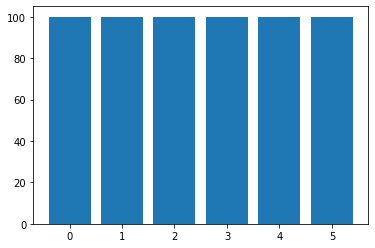

In [10]:
strategy = {0:100, 1:100, 2:100, 3:100, 4:100, 5:100}
oversample = SMOTE(sampling_strategy=strategy)
#oversample = SMOTE()
features, label = oversample.fit_resample(features, label)
counter = Counter(label)
for k,v in counter.items():
	per = v / len(label) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()
#type_dara = ds['TYPE']
#b = pd.get_dummies(type_dara)
# onehot = 

In [11]:
print(features.shape)
print(label.shape)

(600, 9)
(600,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1, stratify=label)
#train, test = train_test_split(dataset, test_size=0.3,stratify=label)
#train, val = train_test_split(train, test_size=0.14)
print(len(X_train), 'train examples')
#print(len(val), 'validation examples')
print(len(X_test), 'test examples')
features_train = X_train
label_train = y_train
b = pd.get_dummies(label_train)
onehot = b.values

420 train examples
180 test examples


In [13]:
features_test = X_test
label_test = y_test
b1 = pd.get_dummies(label_test)
onehot_test = b1.values

Class=5, n=70 (16.667%)
Class=3, n=70 (16.667%)
Class=4, n=70 (16.667%)
Class=2, n=70 (16.667%)
Class=1, n=70 (16.667%)
Class=0, n=70 (16.667%)


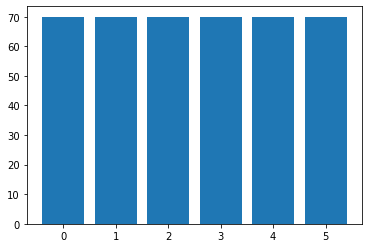

In [14]:
counter = Counter(label_train)
for k,v in counter.items():
	per = v / len(label_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=30 (16.667%)
Class=1, n=30 (16.667%)
Class=5, n=30 (16.667%)
Class=2, n=30 (16.667%)
Class=3, n=30 (16.667%)
Class=4, n=30 (16.667%)


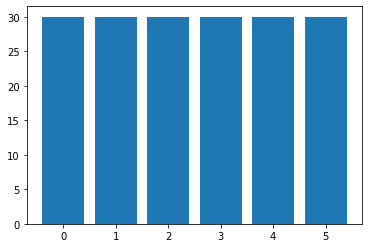

In [15]:
counter = Counter(label_test)
for k,v in counter.items():
	per = v / len(label_test) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [16]:

X_train

array([[ 1.51668491, 14.94270007,  0.        , ...,  8.65379958,
         1.42590119,  0.        ],
       [ 1.51602724, 14.85482618,  0.        , ...,  8.75758691,
         0.64144785,  0.08565644],
       [ 1.52157976, 13.04327568,  0.27855112, ..., 11.42122852,
         0.        ,  0.23634641],
       ...,
       [ 1.51628648, 13.35235093,  3.57764644, ...,  8.20352771,
         0.        ,  0.        ],
       [ 1.51712874, 13.53184093,  3.52707104, ...,  8.62461647,
         0.        ,  0.        ],
       [ 1.52335922, 15.56082308,  1.92117792, ...,  8.89339082,
         1.26600298,  0.        ]])

In [17]:
onehot

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [18]:
mm_scaler = preprocessing.MinMaxScaler()

In [19]:
#features_train = preprocessing.normalize(features_train)

In [20]:
model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(12, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#    tf.keras.layers.Dense(11, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#    tf.keras.layers.Dense(10,activation="relu"),
#    tf.keras.layers.Dense(9,activation="relu"),
#    tf.keras.layers.Dense(8,activation="relu"),
#    tf.keras.layers.Dense(7,activation="relu"),
#     tf.keras.layers.Dense(20,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(400,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(300,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(150,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dense(100,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Softmax()

])

loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer='adam',loss=loss,metrics='CategoricalAccuracy')

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log')

In [ ]:
history = model.fit(features_train, onehot,batch_size=64, epochs=1500,shuffle=True,callbacks=[tensorboard_callback])

Epoch 1/1500
7/7 [==============================] - 0s 5ms/step - loss: 1.9732 - categorical_accuracy: 0.1619
Epoch 2/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8543 - categorical_accuracy: 0.1643
Epoch 3/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8566 - categorical_accuracy: 0.1643
Epoch 4/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8496 - categorical_accuracy: 0.1762
Epoch 5/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8624 - categorical_accuracy: 0.1619
Epoch 6/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8455 - categorical_accuracy: 0.1667
Epoch 7/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8442 - categorical_accuracy: 0.1667
Epoch 8/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8430 - categorical_accuracy: 0.1667
Epoch 9/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8421 - categorical_accuracy: 0.1667
Epoch 10/1

7/7 [==============================] - 0s 4ms/step - loss: 1.8269 - categorical_accuracy: 0.1667
Epoch 75/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8268 - categorical_accuracy: 0.1667
Epoch 76/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8266 - categorical_accuracy: 0.1667
Epoch 77/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8264 - categorical_accuracy: 0.1667
Epoch 78/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8262 - categorical_accuracy: 0.1667
Epoch 79/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.8261 - categorical_accuracy: 0.1667
Epoch 80/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8259 - categorical_accuracy: 0.1667
Epoch 81/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8257 - categorical_accuracy: 0.1667
Epoch 82/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8256 - categorical_accuracy: 0.1667
Epoch 83/1500
7

7/7 [==============================] - 0s 4ms/step - loss: 1.8159 - categorical_accuracy: 0.1548
Epoch 148/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.8158 - categorical_accuracy: 0.1667
Epoch 149/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8157 - categorical_accuracy: 0.1667
Epoch 150/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8156 - categorical_accuracy: 0.1667
Epoch 151/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8155 - categorical_accuracy: 0.1667
Epoch 152/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.8153 - categorical_accuracy: 0.1667
Epoch 153/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8152 - categorical_accuracy: 0.1667
Epoch 154/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8151 - categorical_accuracy: 0.1667
Epoch 155/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8149 - categorical_accuracy: 0.1667
Epoch 1

7/7 [==============================] - 0s 4ms/step - loss: 1.8081 - categorical_accuracy: 0.1667
Epoch 221/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.8080 - categorical_accuracy: 0.1667
Epoch 222/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8079 - categorical_accuracy: 0.1667
Epoch 223/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8077 - categorical_accuracy: 0.1667
Epoch 224/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8077 - categorical_accuracy: 0.1667
Epoch 225/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8076 - categorical_accuracy: 0.1619
Epoch 226/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8075 - categorical_accuracy: 0.1667
Epoch 227/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8074 - categorical_accuracy: 0.1667
Epoch 228/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8073 - categorical_accuracy: 0.1667
Epoch 2

7/7 [==============================] - 0s 4ms/step - loss: 1.8024 - categorical_accuracy: 0.1667
Epoch 294/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8024 - categorical_accuracy: 0.1667
Epoch 295/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8023 - categorical_accuracy: 0.1667
Epoch 296/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8022 - categorical_accuracy: 0.1667
Epoch 297/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8022 - categorical_accuracy: 0.1667
Epoch 298/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8021 - categorical_accuracy: 0.1667
Epoch 299/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8021 - categorical_accuracy: 0.1667
Epoch 300/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.8020 - categorical_accuracy: 0.1667
Epoch 301/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.8019 - categorical_accuracy: 0.1667
Epoch 3

7/7 [==============================] - 0s 4ms/step - loss: 1.7985 - categorical_accuracy: 0.1667
Epoch 367/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7985 - categorical_accuracy: 0.1333
Epoch 368/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7985 - categorical_accuracy: 0.1500
Epoch 369/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7984 - categorical_accuracy: 0.1762
Epoch 370/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7984 - categorical_accuracy: 0.1667
Epoch 371/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7983 - categorical_accuracy: 0.1667
Epoch 372/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7983 - categorical_accuracy: 0.1667
Epoch 373/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7982 - categorical_accuracy: 0.1667
Epoch 374/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7982 - categorical_accuracy: 0.1667
Epoch 3

7/7 [==============================] - 0s 4ms/step - loss: 1.7959 - categorical_accuracy: 0.1667
Epoch 440/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7959 - categorical_accuracy: 0.1667
Epoch 441/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7958 - categorical_accuracy: 0.1667
Epoch 442/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7958 - categorical_accuracy: 0.1667
Epoch 443/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7958 - categorical_accuracy: 0.1667
Epoch 444/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7958 - categorical_accuracy: 0.1667
Epoch 445/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7957 - categorical_accuracy: 0.1667
Epoch 446/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7957 - categorical_accuracy: 0.1667
Epoch 447/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7957 - categorical_accuracy: 0.1667
Epoch 4

7/7 [==============================] - 0s 4ms/step - loss: 1.7942 - categorical_accuracy: 0.1381
Epoch 513/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7942 - categorical_accuracy: 0.1762
Epoch 514/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7941 - categorical_accuracy: 0.1667
Epoch 515/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7941 - categorical_accuracy: 0.1667
Epoch 516/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7941 - categorical_accuracy: 0.1667
Epoch 517/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7941 - categorical_accuracy: 0.1667
Epoch 518/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7941 - categorical_accuracy: 0.1667
Epoch 519/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7940 - categorical_accuracy: 0.1667
Epoch 520/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7940 - categorical_accuracy: 0.1667
Epoch 5

7/7 [==============================] - 0s 3ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 586/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 587/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 588/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 589/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 590/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 591/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7932 - categorical_accuracy: 0.1667
Epoch 592/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7931 - categorical_accuracy: 0.1667
Epoch 593/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7931 - categorical_accuracy: 0.1667
Epoch 5

7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 659/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 660/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 661/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 662/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 663/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 664/1500
7/7 [==============================] - 0s 3ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 665/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 666/1500
7/7 [==============================] - 0s 4ms/step - loss: 1.7925 - categorical_accuracy: 0.1667
Epoch 6

In [ ]:
model.evaluate(features_train, onehot)

In [ ]:
predict = model.predict(features_train)
# Calculate accuracy
out = np.argmax(predict,axis=1)
compare = out == label_train
#accuracy = np.sum(compare) / 319.0*100.0
accuracy = np.sum(compare) / 420.0*100.0
print(accuracy)

In [ ]:
# a1 = test.values
# features_test = a1[:,0:9]
# label_test = a1[:,-1]
# type_data1 = test['TYPE']
# b1 = pd.get_dummies(type_data1)
# onehot_test = b1.values

In [ ]:
#features_test = preprocessing.normalize(features_test)

In [ ]:
predict_test = model.predict(features_test)
# Calculate accuracy
out1 = np.argmax(predict_test,axis=1)
compare1 = out1 == label_test
#accuracy1 = np.sum(compare1) / 137 * 100
accuracy1 = np.sum(compare1) / 180 * 100
print(accuracy1)

In [ ]:
label_train

In [ ]:
predict_crime = model.predict([[1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51]])
# Calculate accuracy
out_crime = np.argmax(predict_crime,axis=1)
print(out_crime)

In [ ]:
print(history.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()